<a href="https://colab.research.google.com/github/Elisa-Torres/SHTE2023/blob/main/Elisa_PapayaLabW3_SelfLearningIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import PIL
import scipy
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive/')
loc = 'drive/MyDrive/Shtem2023/'

Mounted at /content/drive/


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
os.listdir(loc+'all_data')

In [ ]:
np.save(loc+'all_data/cifar10X.npy',x_train[:8000])
np.save(loc+'all_data/cifar10Y.npy',y_train[:8000])

In [ ]:
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
print('\nX:\n',x_train,'\nY:\n', y_train)


X:
 [[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 6

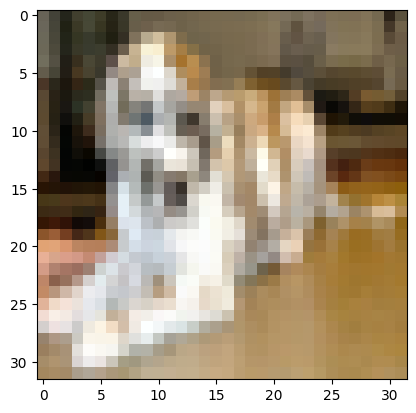

In [ ]:
plt.imshow(x_train[1111])

In [ ]:
print(y_train[1111])

[5]


In [ ]:
cats = '''
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
'''

In [ ]:
v_train = np.zeros((y_train.shape[0],10))
for i in range(y_train.shape[0]):
  v_train[i,y_train[i]] = 1

In [ ]:
print(v_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print(v_train.shape)

(50000, 10)


In [ ]:
recs = {}
for Ntrain in [64,256,1024,4096,16384]:
  input_shape = x_train[0].shape
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=5,input_shape=input_shape, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units=1, activation = 'relu'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=32, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

  # after you create your model it's
  # always a good habit to print out it's summary
  model.summary()
  # adam optimizer works pretty well for
  # all kinds of problems and is a good starting point
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                # MAE error is good for
                # numerical predictions
                loss=tf.keras.losses.CategoricalCrossentropy())
  losses = model.fit(x_train[:Ntrain], v_train[:Ntrain],
                    # it will use 'batch_size' number
                    # of examples per example
                    batch_size=256,
                    epochs=3,  # total epoch
                    )
  recs[Ntrain] = losses.history['loss']

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 5)         20        
                                                                 
 dense_1 (Dense)             (None, 32, 32, 1)         6         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                32800     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 33,156
Trainable params: 33,156
Non-trainable params: 0
_________________________________________________________________


NameError: ignored

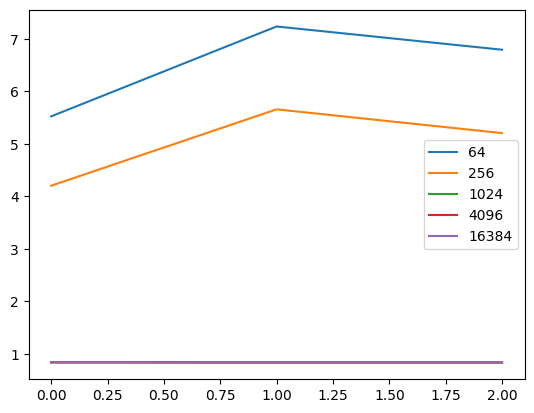

In [ ]:
labels = []
for Ntrain in recs:
  plt.plot(np.log(recs[Ntrain]))
  labels.append(str(Ntrain))
plt.legend(labels)

In [ ]:
pic = x_train[0]

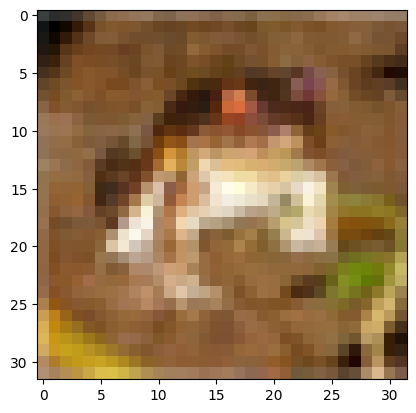

In [ ]:
plt.imshow(pic)

In [ ]:
#auto-generating cropping dimensions to photo
a = np.random.randint(0,32)
b = np.random.randint(a+1,32)
c = np.random.randint(0,32)
d = np.random.randint(c+1,32)

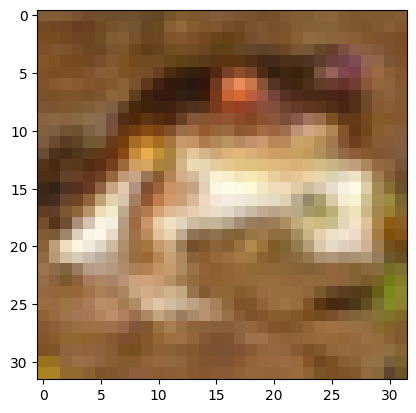

In [ ]:
pic2 = pic[2:30,5:27] #cropping
pic3 = scipy.signal.resample(pic2, 32) #stretching
pic4 = scipy.signal.resample(pic3, 32, axis = 1)
plt.imshow(pic4/255)

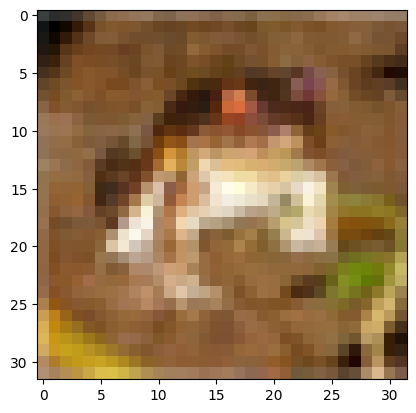

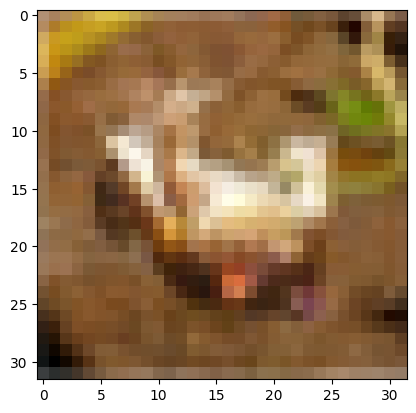

In [ ]:
#flipping image on the x-axis
pic= x_train[0]
plt.imshow(pic)
plt.show()
pic2 = np.zeros_like(pic)
for i in range(32):
  pic2[i,:] = pic[32-i-1]
plt.imshow(pic2)

In [ ]:
#flipping image on the y-axis

In [ ]:
input_shape = x_train[0].shape
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(4, 7, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(4, 3, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Dense(units=5, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=1, activation = 'relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

# after you create your model it's
# always a good habit to print out it's summary
model.summary()
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              # MAE error is good for
              # numerical predictions
              loss=tf.keras.losses.CategoricalCrossentropy())
losses = model.fit(x_train[:Ntrain], v_train[:Ntrain],
                  # it will use 'batch_size' number
                  # of examples per example
                  batch_size=256,
                  epochs=3,  # total epoch
                  )
recs[Ntrain] = losses.history['loss']


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 4)         592       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 4)         148       
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 2)         74        
                                                                 
 dense_20 (Dense)            (None, 22, 22, 5)         15        
                                                                 
 dense_21 (Dense)            (None, 22, 22, 1)         6         
                                                                 
 flatten_5 (Flatten)         (None, 484)               0         
                                                                 
 dense_22 (Dense)            (None, 32)               

In [ ]:
os.listdir(loc + 'Covid')

In [ ]:
Xlist = []
for filename in os.listdir(loc+'Covid')[:]:
  img = PIL.Image.open(loc+'Covid/'+filename)
  img2 = img.resize((300,300))
  img3 = img2.convert('RGB')
  arr = np.array(img3)
  Xlist.append(arr)
  print(arr.shape)

In [ ]:
Xlist[3].shape

(300, 300, 3)

In [ ]:
X = np.asarray(Xlist)
print(X.shape)

(111, 300, 300, 3)


In [ ]:
Ylist = []
numCat = 2
for filename in os.listdir(loc+'Covid'):
  if 'COVID' in filename:
    label = [1,0]
  else :
    label = [0,1]
  Ylist.append(label)

In [ ]:
print(os.listdir(loc+'Covid'))

['01.jpeg', '019.png', '010.png', '015.jpg', '012.jpeg', '02.jpeg', '040.jpeg', '041.jpeg', '046.jpeg', '020.jpg', '021.jpeg', '042.jpeg', '050.jpeg', '022.jpeg', '049.jpeg', '04.png', '025.jpeg', '033.png', '03.jpeg', '047.jpeg', '039.jpeg', '027.jpeg', '031.jpeg', '044.jpeg', '032.jpeg', '024.jpeg', '048.jpeg', '026.jpeg', '045.jpeg', '043.jpeg', 'COVID-00004.jpg', '052.jpeg', '09.png', '051.jpeg', 'COVID-00001.jpg', '08.jpeg', '080.jpg', '053.jpeg', '054.jpeg', '062.jpeg', '090.jpeg', 'COVID-00003b.jpg', '089.jpg', '084.jpeg', '056.jpg', 'COVID-00005.jpg', 'COVID-00002.jpg', '069.jpg', '06.jpeg', '061.jpg', '081.jpeg', '055.jpeg', '092.png', '065.jpeg', '079.jpeg', '059.jpeg', '085.jpeg', '072.jpeg', '088.jpeg', '073.jpg', '091.jpg', '076.jpg', '086.jpg', 'COVID-00003a.jpg', '057.jpeg', '067.jpg', '064.jpg', '07.jpg', '060.jpeg', '082.jpg', '058.jpeg', '074.jpg', '078.jpeg', '083.jpeg', '068.jpg', '071.jpg', 'COVID-00018.jpg', 'COVID-00009.jpg', 'COVID-00023.jpg', 'COVID-00016.jpg',

In [ ]:
Ylist
Y = np.array(Ylist)

Y.shape
print(Y)

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]


In [ ]:
img2 = PIL.Image.open(loc+'cuteAnimals/'+'pup3.jpg')

In [ ]:
input_shape = X[0].shape
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=5,input_shape=input_shape, activation = 'relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=numCat, activation = 'softmax'))

# after you create your model it's
# always a good habit to print out it's summary
model.summary()
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              # MAE error is good for
              # numerical predictions
              loss=tf.keras.losses.CategoricalCrossentropy())
losses = model.fit(X, Y,
                  # it will use 'batch_size' number
                  # of examples per example
                  batch_size=256,
                  epochs=3,  # total epoch
                  )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 300, 300, 5)       20        
                                                                 
 flatten_1 (Flatten)         (None, 450000)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                 900002    
                                                                 
Total params: 900,022
Trainable params: 900,022
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1/1 [==============================] - 3s 3s/step - loss: 8.1627
Epoch 2/3
1/1 [==============================] - 1s 844ms/step - loss: 55013.0000
Epoch 3/3
1/1 [==============================] - 1s 804ms/step - loss: 3273.6033
